LINEAR REGRESSION ON HOUSING DATASET

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
dtr=pd.read_csv("/content/housing_train.csv")
dtr.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
dtr.info( verbose = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 81 entries, Id to SalePrice
dtypes: float64(3), int64(35), object(43)
memory usage: 924.0+ KB


In [ ]:
#drop columns with more than 75% null values
perc = 75.0
min_count =  int(((100-perc)/100)*dtr.shape[0] + 1)
dtr = dtr.dropna( axis=1, thresh=min_count)

dtr.info(verbose = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 77 entries, Id to SalePrice
dtypes: float64(3), int64(35), object(39)
memory usage: 878.4+ KB


In [ ]:
#modify interval data (year to age)
dtr['YearRemodAdd']=2023-dtr['YearRemodAdd']
dtr['Age']=2023-dtr['YearBuilt']
dtr.drop('YearBuilt',axis=1,inplace=True)
dtr['YrSold']=2023-dtr['YrSold']

In [ ]:
#differ object levels with other levels containing null values
dt1=[]
dt2=[]
for i in dtr.columns:
  if(dtr[i].isna().sum())>0:
    print(i," : ",dtr[i].isna().sum())
    if dtr[i].dtype =='O':
      dt1.append(i)
    else:
      dt2.append(i)

LotFrontage  :  259
MasVnrType  :  8
MasVnrArea  :  8
BsmtQual  :  37
BsmtCond  :  37
BsmtExposure  :  38
BsmtFinType1  :  37
BsmtFinType2  :  38
Electrical  :  1
FireplaceQu  :  690
GarageType  :  81
GarageYrBlt  :  81
GarageFinish  :  81
GarageQual  :  81
GarageCond  :  81


In [ ]:
dt1 

['MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [ ]:
dt2

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

69.0

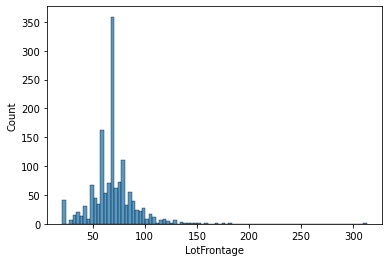

In [ ]:
#filling null values with median
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(dtr['LotFrontage']data=df, x="X", ax=ax_hist, bins=bin_nr, stat="density", alpha=0.4, kde=True, kde_kws={"cut": 3})
dtr['LotFrontage'].fillna(dtr['LotFrontage'].median(),inplace=True)
dtr['LotFrontage'].median()


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


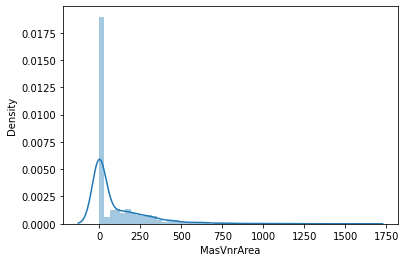

In [ ]:
sns.distplot(dtr['MasVnrArea'])
dtr['MasVnrArea'].fillna(dtr['MasVnrArea'].median(),inplace=True)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


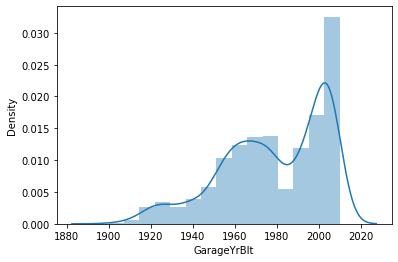

In [ ]:
sns.distplot(train['GarageYrBlt'])
train['GarageYrBlt'].fillna(train['GarageYrBlt'].median(),inplace=True)

In [ ]:
train['MasVnrType'].fillna(train['MasVnrType'].mode()[0],inplace=True)
train['BsmtQual'].fillna(train['BsmtQual'].mode()[0],inplace=True)
train['BsmtCond'].fillna(train['BsmtCond'].mode()[0],inplace=True)
train['BsmtExposure'].fillna(train['BsmtExposure'].mode()[0],inplace=True)
train['BsmtFinType1'].fillna(train['BsmtFinType1'].mode()[0],inplace=True)
train['Electrical'].fillna(train['Electrical'].mode()[0],inplace=True)
train['GarageType'].fillna(train['GarageType'].mode()[0],inplace=True)
train['GarageFinish'].fillna(train['GarageFinish'].mode()[0],inplace=True)
train['GarageQual'].fillna(train['GarageQual'].mode()[0],inplace=True)
train['GarageCond'].fillna(train['GarageCond'].mode()[0],inplace=True)
train['BsmtFinType2'].fillna(train['BsmtFinType2'].mode()[0],inplace=True)
train['FireplaceQu'].fillna(train['FireplaceQu'].mode()[0],inplace=True)


In [ ]:
for i in train.columns:
  if(train[i].isna().sum())>0:
    print(i," : ",train[i].isna().sum())

train.shape

(1460, 77)

(array([148., 723., 373., 135.,  51.,  19.,   4.,   3.,   2.,   2.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <BarContainer object of 10 artists>)

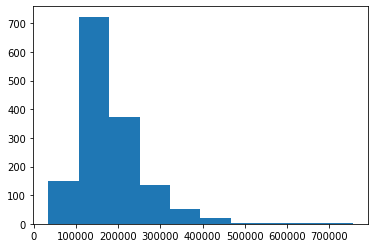

In [ ]:
plt.hist("SalePrice",data=train)

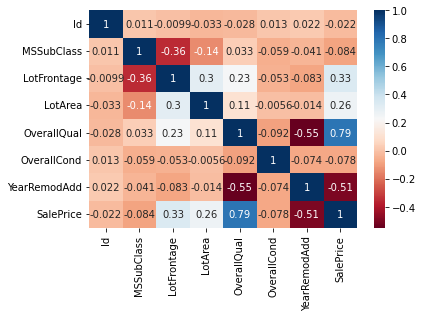

In [ ]:
train1=train.iloc[:,0:21]
train1['SalePrice']=train['SalePrice']
sns.heatmap(train1.corr(),annot=True,cmap="RdBu")
plt.show()

In [ ]:
train.drop('Id',axis=1,inplace=True)
train.drop('MSSubClass',axis=1,inplace=True)
train.drop('OverallCond',axis=1,inplace=True)

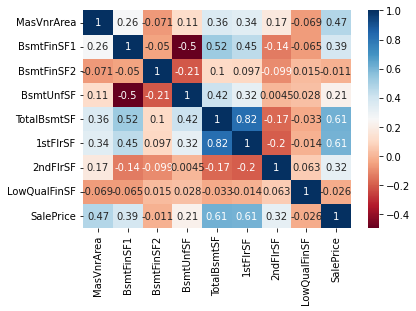

In [ ]:
train1=train.iloc[:,21:41]
train1['SalePrice']=train['SalePrice']
sns.heatmap(train1.corr(),annot=True,cmap="RdBu")
plt.show()

In [ ]:
train.drop('BsmtFinSF2',axis=1,inplace=True)


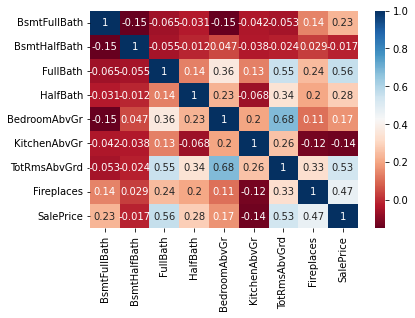

In [ ]:
train1=train.iloc[:,41:51]
train1['SalePrice']=train['SalePrice']
sns.heatmap(train1.corr(),annot=True,cmap="RdBu")
plt.show()

In [ ]:
train.drop('BsmtFullBath',axis=1,inplace=True)


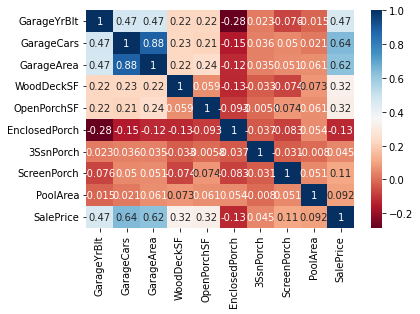

In [ ]:
train1=train.iloc[:,51:65]
train1['SalePrice']=train['SalePrice']
sns.heatmap(train1.corr(),annot=True,cmap="RdBu")
plt.show()

In [ ]:
train.drop('3SsnPorch',axis=1,inplace=True)

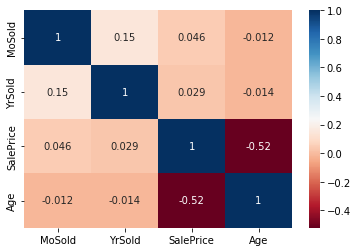

In [ ]:
train1=train.iloc[:,65:]
train1['SalePrice']=train['SalePrice']
sns.heatmap(train1.corr(),annot=True,cmap="RdBu")
plt.show()

In [ ]:
train.drop('MiscVal',axis=1,inplace=True)
train.drop('MoSold',axis=1,inplace=True)
train.drop('YrSold',axis=1,inplace=True)


In [ ]:
train.shape

(1460, 68)

In [ ]:
# #Preprocessing
# train.drop('Alley',axis=1,inplace=True)
# train.drop('PoolQC',axis=1,inplace=True)
# train.drop('MiscFeature',axis=1,inplace=True)

<AxesSubplot:>

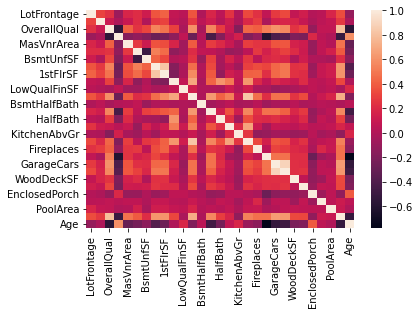

In [ ]:
sns.heatmap(train.corr())

In [ ]:
# train.drop('Neighborhood','BldgType',axis=1,inplace=True)

In [ ]:
objcols=train.select_dtypes(include='object').columns.tolist()
train=pd.get_dummies(train, columns=objcols)  #hot encoding

In [ ]:
train.shape

(1460, 268)

In [ ]:
x=train.corr()["SalePrice"].sort_values()
x.head(40)

ExterQual_TA           -0.589044
Age                    -0.522897
KitchenQual_TA         -0.519298
GarageFinish_Unf       -0.513906
YearRemodAdd           -0.507101
BsmtQual_TA            -0.498545
MasVnrType_None        -0.367456
GarageType_Detchd      -0.354141
Foundation_CBlock      -0.343263
BsmtExposure_No        -0.319990
HeatingQC_TA           -0.312677
MSZoning_RM            -0.288065
LotShape_Reg           -0.267672
CentralAir_N           -0.251328
SaleType_WD            -0.242598
RoofStyle_Gable        -0.224744
PavedDrive_N           -0.212630
Foundation_BrkTil      -0.204117
FireplaceQu_Gd         -0.195968
Electrical_FuseA       -0.193978
Neighborhood_OldTown   -0.192189
Neighborhood_NAmes     -0.188513
Neighborhood_Edwards   -0.179949
Exterior1st_MetalSd    -0.167068
Neighborhood_IDOTRR    -0.164056
HouseStyle_1.5Fin      -0.163466
Exterior2nd_MetalSd    -0.162389
Exterior2nd_Wd Sdng    -0.161800
Exterior1st_Wd Sdng    -0.158619
KitchenQual_Fa         -0.157199
SaleCondit

In [ ]:
#applying linear reg
lr=LinearRegression()
x=train.drop("SalePrice",axis=1)
y=train["SalePrice"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=1)
sc = StandardScaler()
  
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [ ]:
y_pred=lr.predict(x_test)


In [ ]:
r2_score=lr.score(x_train,y_train)
print("MSE: ",mean_squared_error(y_test,y_pred))
print(r2_score)

MSE:  1304539827.3253117
0.9201625254810135
